In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import os

C:\Users\Krist\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def getStatistics(files):
    if files == 1:
        filesForProcessing = availableFiles[:]
        
    elif isinstance(files,list):
        filesForProcessing = files[:]
    else:
        print("Incorrect format - please specify either a list or '1'")
    
    for element in filesForProcessing:
        print("-----------------------------------------------------------------------------------------------")
        print("The file being processed is: %s" % element)
        
        with open(path + "/"+element,"r") as file:
            temp = file.readlines()

        tempClean = [re.sub("[\n ]","",i) for i in temp]

        if len(tempClean[0]) == 1:

            tempClean = [int(i) for i in tempClean]

            uniqueVals, counts = np.unique(tempClean,return_counts = True)# Perhaps should listOfObs be sorted?

            if len(uniqueVals) > 50:
                print("\nThere are more than 50 unique values, so a histogram over the values are shown.")
#                     answer = input("There are more than 50 unique values, do you want to see them? ")

#                     if (answer == 'yes') or (answer == 'Yes'):
#                         print("The unique values and their frequency count, presented as {unique Value: Count}, are:\n")
#                         print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")
                plt.hist(tempClean)
                plt.title("Distribution of the data")
                plt.show()
            else:
                print("\nThe unique values and their frequency count, presented as {unique Value: Count}, are:\n")
                print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

        else:

            tempClean = [re.split(",",i) for i in tempClean]

            lenOfElements = len(tempClean[0])

            database = [[] for i in np.arange(lenOfElements)]

            # Dividing in the observations
            for observation in tempClean:
                for partial in enumerate(observation):

                    database[partial[0]].append(int(partial[1]))

            # Getting information on the content of each list in the database.
            print("\nThe file contains %i separate streams of values." % lenOfElements)
            for listOfObs in database:
                uniqueVals, counts = np.unique(listOfObs,return_counts = True)# Perhaps should listOfObs be sorted?

                if (all(counts == 1)):
                    answer = input("\nAll values of the variable currently being processed is equal to one, which indiates\
that the values are numberic of other values. Do you want to disregard the processing of these values? ")
                    if (answer == 'no') or (answer == 'No'):
                        print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

                else:
                    if len(uniqueVals) > 50:
#                             answer = input("There are more than 50 unique values, do you want to see them? ")

#                             if (answer == 'yes') or (answer == 'Yes'):
#                                 print("The unique values and their frequency count, presented as {unique Value: Count}, are:\n")
#                                 print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")
                        print("\nThere are more than 50 unique values, so a histogram over the values are shown.")
                        plt.hist(listOfObs)
                        plt.title("Distribution of the data")
                        plt.show()
                    else:
                        print("\nThe unique values and their frequency count, presented as {unique Value: Count}, are:\n")
                        print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

In [3]:
availableFolders = {}
folderCount = 0

for element in os.listdir("../Assets/Exported_Data"):
    if ("txt" not in element) and ("meta" not in element):
        availableFolders[folderCount] = element
        folderCount += 1
        

In [4]:
print("The available folders, containing the data of interest, are:")
availableFolders

The available folders, containing the data of interest, are:


{0: 'Profiling - FullSetupWithVisualInput',
 1: 'Profiling-1.10',
 2: 'Profiling-1.4',
 3: 'Profiling-1.5',
 4: 'Profiling-1.6',
 5: 'Profiling-1.7',
 6: 'Profiling-1.8',
 7: 'Profiling-1.9'}

In [12]:
path = "C:/Users/Krist/GitHub/ml-agents/Dissertation/Assets/Exported_Data/"+availableFolders[7]# <- Choose the folders from above

## Statistics on the content of the files in the folder

In [13]:
availableFiles = [ele for ele in os.listdir(path) if "meta" not in ele]
print("The available files are: ")
availableFiles

The available files are: 


['pedCount.txt', 'posCount.txt', 'sensorCloudCount.txt']

-----------------------------------------------------------------------------------------------
The file being processed is: pedCount.txt

The unique values and their frequency count, presented as {unique Value: Count}, are:

{0: 1129, 1: 642} 

-----------------------------------------------------------------------------------------------
The file being processed is: posCount.txt

There are more than 50 unique values, so a histogram over the values are shown.


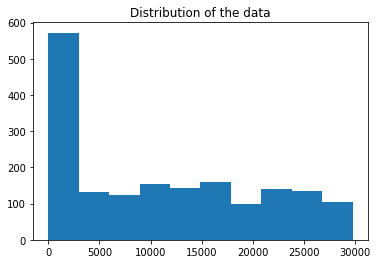

-----------------------------------------------------------------------------------------------
The file being processed is: sensorCloudCount.txt

The file contains 3 separate streams of values.

There are more than 50 unique values, so a histogram over the values are shown.


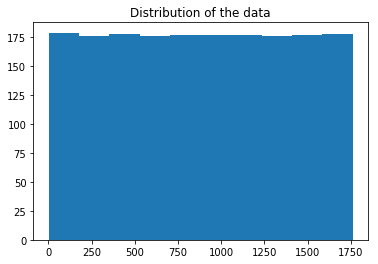


The unique values and their frequency count, presented as {unique Value: Count}, are:

{0: 1516, 1: 60, 2: 26, 3: 20, 4: 16, 5: 6, 6: 14, 7: 10, 8: 6, 9: 5, 10: 10, 11: 5, 12: 10, 13: 8, 14: 3, 15: 2, 16: 5, 17: 4, 18: 6, 19: 5, 20: 6, 21: 3, 22: 3, 23: 7, 24: 3, 25: 3, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 48: 1, 72: 1} 


The unique values and their frequency count, presented as {unique Value: Count}, are:

{0: 1277, 1: 494} 



In [14]:
# List the files you want to see statistics on as a list, or enter "1" to get statistics for all files.
getStatistics(1)

### Collisions with Pedestrians

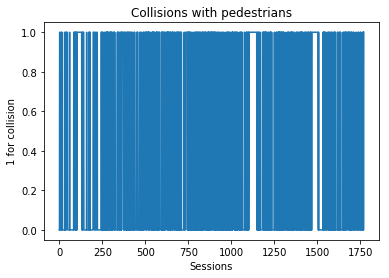

In [15]:
try:
    with open(path+"/pedCount.txt", "r") as pedFile:
        importedPedData = pedFile.readlines()
    
    importedPedDataClean = [int(re.sub("\n","",i)) for i in importedPedData]
    
    plt.plot(np.arange(len(importedPedDataClean)),importedPedDataClean)
    plt.title("Collisions with pedestrians")
    plt.ylabel("1 for collision")
    plt.xlabel("Sessions")
    plt.show()
    
except:
    print("The file wasn't found in this folder")

### Collisions with sensor clouds

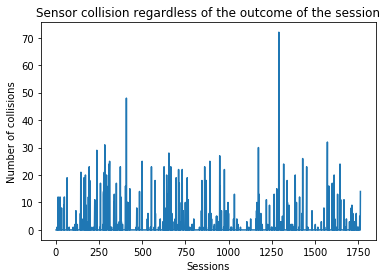

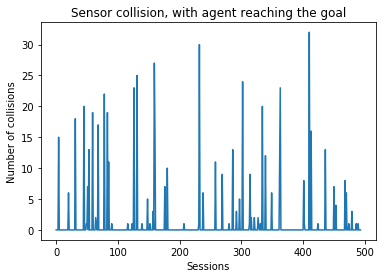

In [16]:
try:
    with open(path+"/sensorCloudCount.txt", "r") as sccFile:
        importedSccData = sccFile.readlines()
       
    sessions = []
    numberOfCollisions = []
    sessionEndedAtGoal = []

    for obs in importedSccData:
        temp = re.split(",",re.sub("[\n ]","",obs))

        # Appending the data to the relevant variables
        sessions.append(int(temp[0]))
        numberOfCollisions.append(int(temp[1]))
        sessionEndedAtGoal.append(int(temp[2]))

    plt.plot(sessions,numberOfCollisions)
    plt.title("Sensor collision regardless of the outcome of the session")
    plt.xlabel("Sessions")
    plt.ylabel("Number of collisions")
    plt.show()
    
    subNumberOfCollisions = np.array(numberOfCollisions)[np.array(sessionEndedAtGoal)==1]
    goalSessions = np.array(sessionEndedAtGoal)[np.array(sessionEndedAtGoal)==1]
    
    plt.plot(np.arange(len(goalSessions)),subNumberOfCollisions)
    plt.title("Sensor collision, with agent reaching the goal")
    plt.xlabel("Sessions")
    plt.ylabel("Number of collisions")
    plt.show()
    
except:
    print("The file wasn't found in this folder")

### Length of trials drawn

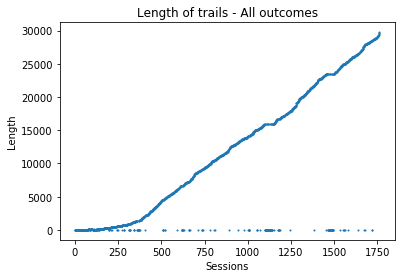

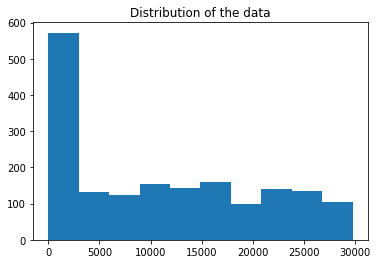

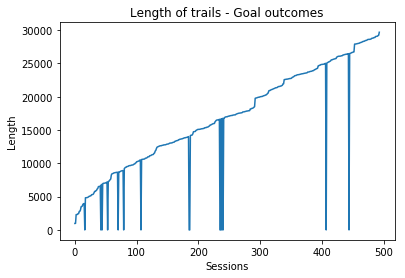


Distribution of the data



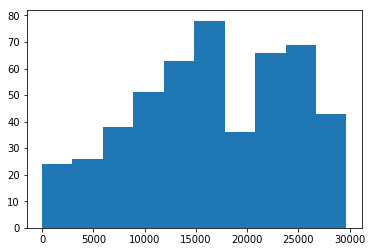

In [20]:
try:
    with open(path+"/posCount.txt", "r") as posFile:
        importedPosData = posFile.readlines()

    importedPosDataClean = [int(re.sub("\n","",i)) for i in importedPosData]
    
    plt.plot(np.arange(len(importedPosDataClean)),importedPosDataClean, marker="o", linewidth=0, markersize=1)
    plt.title("Length of trails - All outcomes")
    plt.ylabel("Length")
    plt.xlabel("Sessions")
    plt.show()

    plt.hist(importedPosDataClean)
    plt.title("Distribution of the data")
    plt.show()
    
    importedPosDataCleanGoal = np.array(importedPosDataClean)[np.array(sessionEndedAtGoal[9:])==1]
    
    plt.plot(np.arange(len(importedPosDataCleanGoal)),importedPosDataCleanGoal)
    plt.title("Length of trails - Goal outcomes")
    plt.ylabel("Length")
    plt.xlabel("Sessions")
    plt.show()
    
    print("\nDistribution of the data\n")
    
    plt.hist(importedPosDataCleanGoal)
    plt.show()
    
except:
    print("The error can have occured because of two reasons; \
Either the file wasn't found in this folder or there is a length mismatch between \
posCount.txt and sensorCloudCount.txt.")

In [18]:
len(sessionEndedAtGoal)

1771

In [29]:
np.mean(importedPosDataCleanGoal)

16685.295546558704

In [30]:
np.median(importedPosDataCleanGoal)

16976.5

In [22]:
vals, counts = np.unique(importedPosDataCleanGoal, return_counts = True)

In [27]:
vals

array([    2,   970,   985,  2301,  2313,  2322,  2441,  2453,  2778,
        2792,  3000,  3480,  3522,  3585,  3864,  3925,  3968,  4825,
        4833,  4845,  4860,  4907,  4955,  5051,  5059,  5117,  5136,
        5286,  5303,  5321,  5400,  5582,  5786,  5787,  5892,  5933,
        6146,  6215,  6504,  6520,  6543,  6580,  6831,  6944,  6995,
        7014,  7024,  7030,  7090,  7112,  7190,  7278,  7299,  7435,
        7544,  7644,  8258,  8424,  8449,  8491,  8556,  8577,  8610,
        8616,  8638,  8656,  8658,  8708,  8718,  8750,  8807,  8854,
        8872,  8888,  8919,  9215,  9302,  9405,  9410,  9511,  9523,
        9540,  9620,  9649,  9654,  9670,  9703,  9739,  9750,  9759,
        9828,  9899,  9912, 10040, 10089, 10241, 10259, 10302, 10363,
       10370, 10474, 10500, 10579, 10595, 10605, 10631, 10635, 10655,
       10768, 10784, 10797, 10860, 10972, 10980, 10983, 11132, 11144,
       11168, 11246, 11289, 11304, 11331, 11494, 11545, 11841, 11943,
       12219, 12422,

In [28]:
counts

array([15,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

### A, not successfull - yet, try to use visualise the above on Tensorboard

In [ ]:
test = np.random.randint(0,3,10)

In [ ]:
#x_scalar = tf.get_variable('x_scalar', shape=[], initializer=tf.truncated_normal_initializer(mean=0, stddev=1))
x_scalar_1 = tf.get_variable('x_scalar_1', initializer=test)

In [ ]:
tf.reset_default_graph()
# ____step 1:____ create the scalar summary
first_summary = tf.summary.scalar(name='My_first_scalar_summary_1', tensor=x_scalar)
init = tf.global_variables_initializer()
# launch the graph in a session
with tf.Session() as sess:
    # ____step 2:____ creating the writer inside the session
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    for step in range(100):
        # loop over several initializations of the variable
        sess.run(init)
        # ____step 3:____ evaluate the scalar summary
        summary = sess.run(first_summary)
        # ____step 4:____ add the summary to the writer (i.e. to the event file)
        writer.add_summary(summary, step)
    print('Done with writing the scalar summary')

In [ ]:
#import tensorflow as tf
tf.reset_default_graph()   # To clear the defined variables and operations of the previous cell
# create the scalar variable
x_scalar = tf.get_variable('x_scalar', shape=[], initializer=tf.truncated_normal_initializer(mean=0, stddev=1))
# ____step 1:____ create the scalar summary
first_summary = tf.summary.scalar(name='My_first_scalar_summary', tensor=x_scalar)
init = tf.global_variables_initializer()
# launch the graph in a session
with tf.Session() as sess:
    # ____step 2:____ creating the writer inside the session
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    for step in range(100):
        # loop over several initializations of the variable
        sess.run(init)
        # ____step 3:____ evaluate the scalar summary
        summary = sess.run(first_summary)
        # ____step 4:____ add the summary to the writer (i.e. to the event file)
        writer.add_summary(summary, step)
    print('Done with writing the scalar summary')